In [ ]:
import sys
import os
build_path = os.path.join(os.getcwd(), "..", "build")
!cmake -B {build_path} -DPYTHON_EXECUTABLE={sys.executable} -Wno-dev ..
!cmake --build {build_path}
if build_path not in sys.path:
    sys.path.append(build_path)
import pypumila
# to reload pypumila, restart python kernel.
# importlib.reload(pypumila) <- does not work

In [2]:
os.chdir(build_path)
sim = pypumila.GameSim()

In [3]:
import numpy as np

In [4]:
from tqdm.notebook import tqdm

In [5]:
import random

In [7]:
models = []
models_first = []
rewards = []
scores = []
for i, hidden in enumerate(np.geomspace(1, 1000, 7)):
    print(f"hidden = {int(hidden)}")
    models.append(pypumila.Pumila6.make_shared(int(hidden)))
    models_first.append(models[i].copy())
    it = 10000
    rewards.append([])
    scores.append([])
    with tqdm(total=it) as pbar:
        while pbar.n < it:
            sim = pypumila.GameSim()
            rnd_p = random.random()
            # print(rnd_p)
            for e in range(50):
                pbar.update()
                a = models[i].get_action_rnd(sim.field, rnd_p)
                models[i].learn_step(sim.field)
                # diff = model.mean_diff
                sim.put(pypumila.actions[a])
                while not sim.is_free_phase():
                    sim.step()
                reward = models[i].calc_reward(sim.field)
                rewards[i].append(reward)
                # diffs.append(diff)
                # このdiffはだいぶ前の学習結果で使ったdiffなので参考にならない
                #print(f"a = {a}, reward = {reward}, chain = {sim.field.prev_chain_num}, diff = {diff}")
            # print("reset sim")
            scores[i].append(sim.field.total_score)
            

hidden = 1


  0%|          | 0/10000 [00:00<?, ?it/s]

hidden = 3


  0%|          | 0/10000 [00:00<?, ?it/s]

hidden = 10


  0%|          | 0/10000 [00:00<?, ?it/s]

hidden = 31


  0%|          | 0/10000 [00:00<?, ?it/s]

hidden = 100


  0%|          | 0/10000 [00:00<?, ?it/s]

hidden = 316


  0%|          | 0/10000 [00:00<?, ?it/s]

hidden = 1000


  0%|          | 0/10000 [00:00<?, ?it/s]

In [8]:
import matplotlib.pyplot as plt

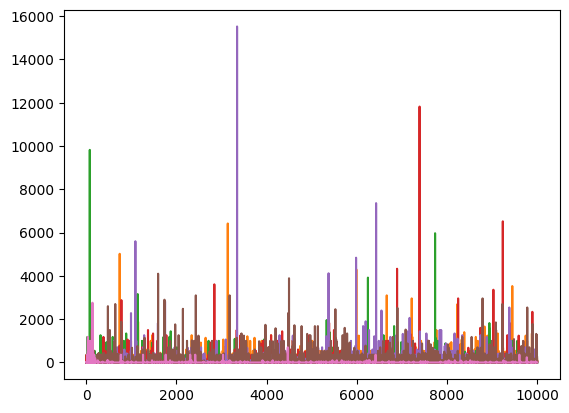

In [12]:
plt.plot(np.array(rewards).T, label=[str(int(h)) for h in np.geomspace(1, 1000, 7)])

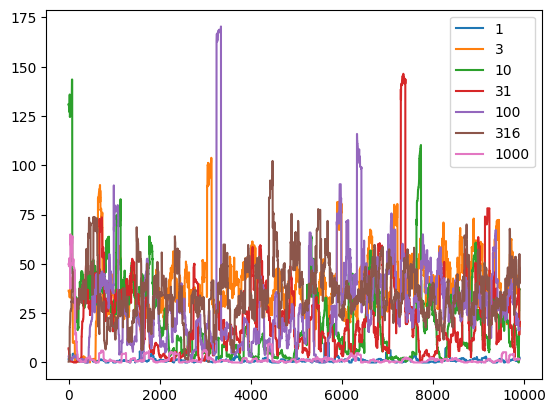

In [16]:
ar = np.array(rewards)
plt.plot(
    np.array([[np.average(ar[j, i:i+100]) for i in range(len(rewards[j])-100)] for j in range(7)]).T,
    label=[str(int(h)) for h in np.geomspace(1, 1000, 7)]
)
plt.legend()

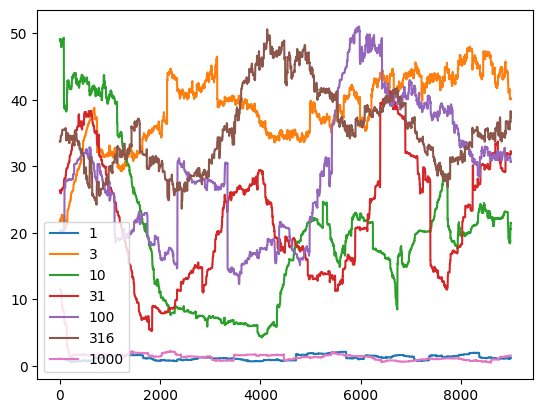

In [17]:
ar = np.array(rewards)
plt.plot(
    np.array([[np.average(ar[j, i:i+1000]) for i in range(len(rewards[j])-1000)] for j in range(7)]).T,
    label=[str(int(h)) for h in np.geomspace(1, 1000, 7)]
)
plt.legend()

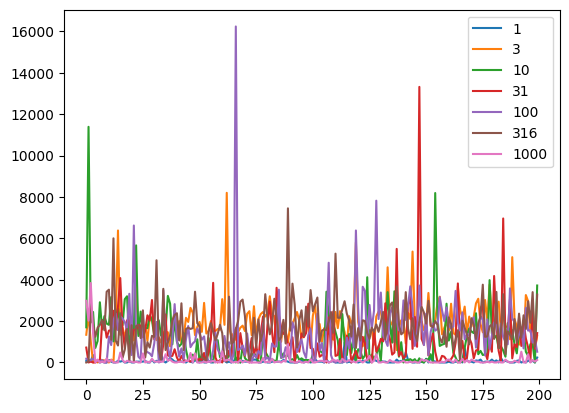

In [18]:
plt.plot(np.array(scores).T, label=[str(int(h)) for h in np.geomspace(1, 1000, 7)])
plt.legend()

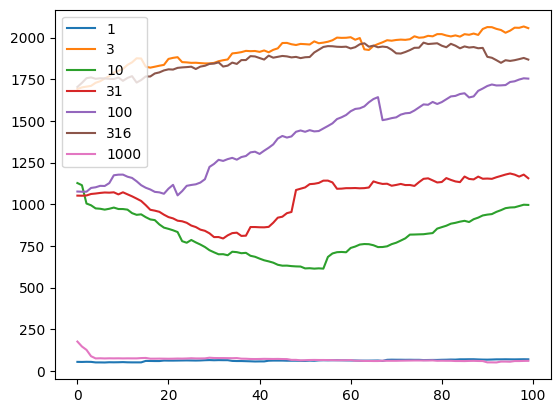

In [20]:
ar = np.array(scores)
plt.plot(
    np.array([[np.average(ar[j, i:i+100]) for i in range(len(scores[j])-100)] for j in range(7)]).T,
    label=[str(int(h)) for h in np.geomspace(1, 1000, 7)]
)
plt.legend()

In [27]:
sim = pypumila.GameSim()
win = pypumila.Window(sim)
win.step(False)

In [28]:
while True:
    # print(model.main.forward(model.get_in_nodes(sim.field).in_nodes).q)
    a = models[5].get_action(sim)
    sim.put(pypumila.actions[a])
    while not sim.is_free_phase():
        win.step(True)
    for i in range(15):
        win.step(True)

KeyboardInterrupt: 

In [26]:
win.quit()